In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file("cats_and_dogs.zip", origin=url, extract=True)

68606236/68606236 [==============================] - 26s 0us/step


In [3]:
import os
base_dir = os.path.join(os.path.dirname(dataset_path), 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
63/63 [==============================] - 46s 701ms/step - loss: 0.7559 - accuracy: 0.5055 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 2/5
63/63 [==============================] - 39s 615ms/step - loss: 0.6820 - accuracy: 0.5420 - val_loss: 0.6679 - val_accuracy: 0.6390
Epoch 3/5
63/63 [==============================] - 37s 592ms/step - loss: 0.6668 - accuracy: 0.6070 - val_loss: 0.6794 - val_accuracy: 0.6010
Epoch 4/5
63/63 [==============================] - 38s 602ms/step - loss: 0.6173 - accuracy: 0.6635 - val_loss: 0.7306 - val_accuracy: 0.6070
Epoch 5/5
63/63 [==============================] - 38s 595ms/step - loss: 0.5299 - accuracy: 0.7300 - val_loss: 0.6553 - val_accuracy: 0.6670


In [9]:
loss, acc = model.evaluate(val_ds, verbose=0)
print(f"Validation Accuracy: {acc*100:.2f}%")

Validation Accuracy: 66.70%


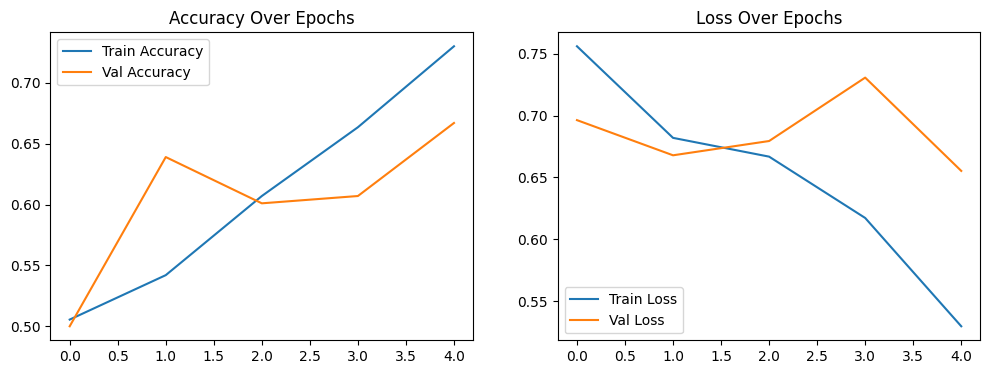

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.show()

In [11]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

In [14]:
img_path = "dog.jpg"   
img = load_img(img_path, target_size=(150, 150))

In [15]:
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [16]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🐶 It's a Dog!")
else:
    print("🐱 It's a Cat!")

1/1 [==============================] - 0s 123ms/step
🐶 It's a Dog!
